In [16]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import warnings
from scipy.optimize import curve_fit
from scipy import integrate
import natural_cubic_spline_stack_overflow as ncs
import dynamic_stock_model as dsm 
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from math import *


## Lifetime modelling

EPISCOPE/TABULA allows us to do approximations of average lifetimes for each dwelling type. 

In [17]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [18]:
TYP = ['AB','MFH','SFH','TH']
LT = [46,61,47,64]
DEV = [25,25,25,25]

print(Average(LT))

DSM = pd.read_csv("Model/DSM_TOT.csv")
DSM = DSM.set_index('DSM')
DSM_AB = pd.read_csv("Model/DSM_AB.csv")
DSM_AB = DSM_AB.set_index('DSM AB')
DSM_MFH = pd.read_csv("Model/DSM_MFH.csv")
DSM_MFH = DSM_MFH.set_index('DSM MFH')
DSM_SFH = pd.read_csv("Model/DSM_SFH.csv")
DSM_SFH = DSM_SFH.set_index('DSM SFH')
DSM_TH = pd.read_csv("Model/DSM_TH.csv")
DSM_TH = DSM_TH.set_index('DSM TH')
display(DSM_TH.loc[1980:2020])


54.5


,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM TH,,,,,,
1980,46787100.0,NaN,2.493186,NaN,NaN,NaN
1981,46820902.5,NaN,2.483244,NaN,NaN,NaN
1982,46777168.5,NaN,2.474013,NaN,NaN,NaN
1983,46813846.5,NaN,2.465440,NaN,NaN,NaN
1984,46912222.0,NaN,2.457472,NaN,NaN,NaN
1985,47057179.5,NaN,2.450055,NaN,NaN,NaN
1986,47187821.5,NaN,2.443136,NaN,NaN,NaN
1987,47300209.5,NaN,2.436679,NaN,NaN,NaN
1988,47412171.0,NaN,2.430676,NaN,NaN,NaN


In [19]:
def logistic_stock(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value
    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM,,,,,,
1600,3.776927e+06,8.023546e+05,4.707304,NaN,NaN,NaN
1601,3.781220e+06,8.032665e+05,4.707304,NaN,NaN,NaN
1602,3.785584e+06,8.041936e+05,4.707304,NaN,NaN,NaN
1603,3.790022e+06,8.051364e+05,4.707304,NaN,NaN,NaN
1604,3.794534e+06,8.060949e+05,4.707304,NaN,NaN,NaN
...,...,...,...,...,...,...
2046,6.034682e+07,3.002637e+07,2.009794,NaN,NaN,NaN
2047,6.046523e+07,3.031293e+07,1.994701,NaN,NaN,NaN
2048,6.058215e+07,3.060310e+07,1.979608,NaN,NaN,NaN


Input in year 2022:  519752.10238434374
Output in year 2022:  361131.77361921564
Input in year 2022:  601021.9254554545
Output in year 2022:  405783.82379499386
I is:  451
O is:  451


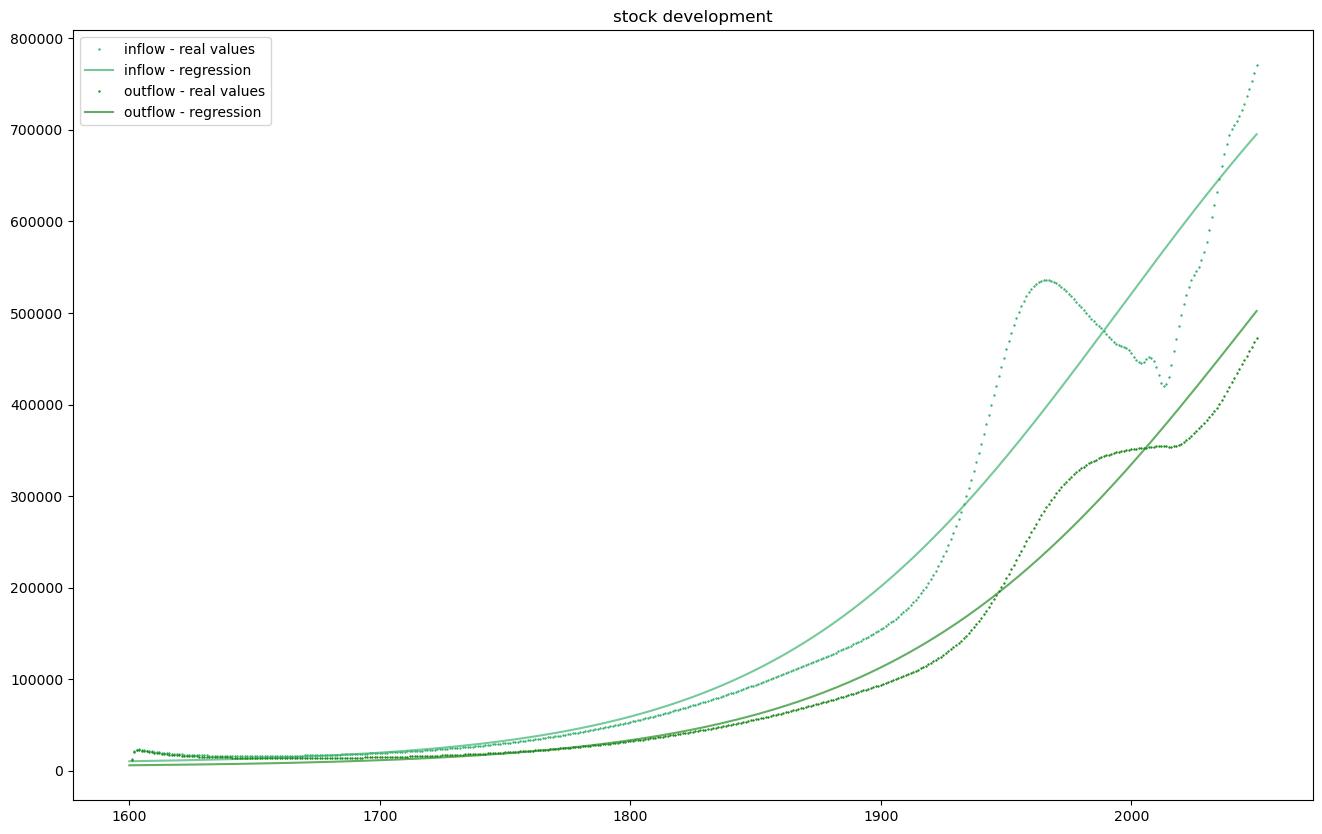

,Population,Stock,PpD,Stock change,Inflow,Outflow
DSM,,,,,,
1600,3.776927e+06,8.023546e+05,4.707304,NaN,NaN,NaN
1601,3.781220e+06,8.032665e+05,4.707304,NaN,12871.102383,11959.223402
1602,3.785584e+06,8.041936e+05,4.707304,NaN,21684.800951,20757.616692
1603,3.790022e+06,8.051364e+05,4.707304,NaN,23294.062752,22351.318452
1604,3.794534e+06,8.060949e+05,4.707304,NaN,23426.960256,22468.396985
...,...,...,...,...,...,...
2046,6.034682e+07,3.002637e+07,2.009794,NaN,736400.605099,453377.867161
2047,6.046523e+07,3.031293e+07,1.994701,NaN,744716.143952,458162.229157
2048,6.058215e+07,3.060310e+07,1.979608,NaN,753156.058393,462984.312071


In [20]:
lifetime = {
    'Type': 'LogNormal', # LogNormal ; FoldedNormal
    'Mean': np.array([125]), 
    'StdDev': np.array([35])
}

flow = dsm.DynamicStockModel(t=DSM.index,name="total dwelling stock",s=np.array(DSM['Stock']),lt=lifetime)

S_C, O_C, I = flow.compute_stock_driven_model()
O = flow.compute_outflow_total()
DS = flow.compute_stock_change()

#display(I)
#display(O)

DSM_model = DSM.copy(deep=True)
#DSM_model = DSM.set_index('Unnamed: 0')
DSM_model.index.Name = None
display(DSM_model)

inputs = DSM.index
outputs = DSM["Stock"]
pred_inputs = DSM_model.index

popt, pcov = curve_fit(logistic_stock, DSM.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
O_model = logistic_stock(DSM_model.index, *popt)

popt, pcov = curve_fit(logistic_stock, DSM.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
I_model = logistic_stock(DSM_model.index, *popt)

print('Input in year 2022: ', I[2022-1600])
print('Output in year 2022: ', O[2022-1600])
print('Input in year 2022: ', I_model[2022-1600])
print('Output in year 2022: ', O_model[2022-1600])
print('I is: ', len(I))
print('O is: ', len(O))

plt.figure(figsize=(16,10))
#plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
plt.plot(DSM_model.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
plt.plot(DSM_model.index, I_model, color = 'mediumseagreen', markersize = 1, label = f'inflow - regression', alpha=0.7)
plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
plt.plot(DSM_model.index, O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
plt.title('stock development')
plt.legend()
plt.show()

DSM_model['Outflow'][1:] = O[1:]
DSM_model['Inflow'][1:] = I[1:]

display(DSM_model)

Input in year 1970:  283277.21239632874
Input modelle in year 1970:  277860.89364067314
Output in year 1970:  53879.74388943924
Input in year 2022:  268392.5951252373
Input modelled in year 2022:  265803.0734633041
Output in year 2022:  109772.26636010615


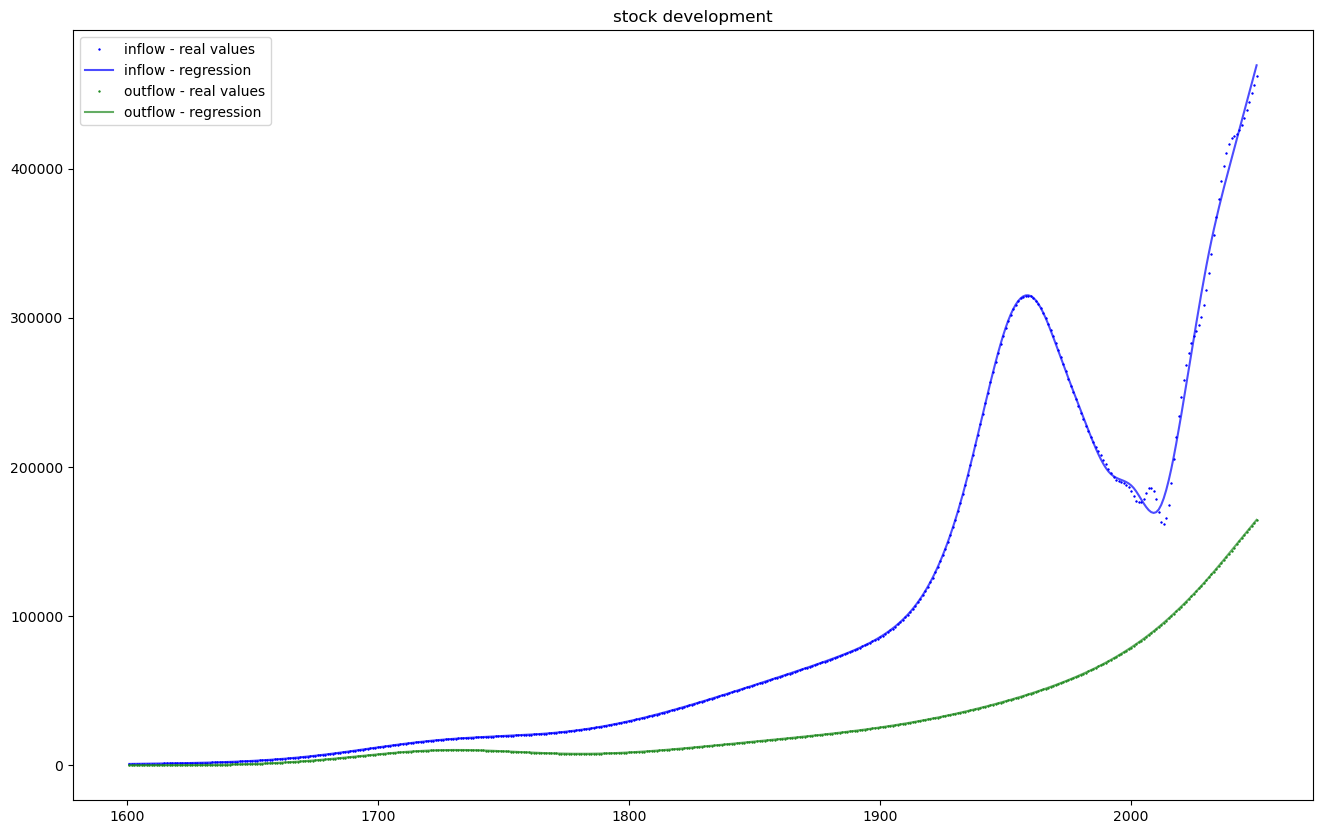

<Figure size 640x480 with 0 Axes>

In [21]:
def stock_driven_flows(lt_mean,lt_dev,dystomod,nm="dwelling stock"):
    lifetime = {
    'Type': 'Normal', # LogNormal ; FoldedNormal ; #Normal
    'Mean': np.array([lt_mean]), 
    'StdDev': np.array([lt_dev])
    }
    flow = dsm.DynamicStockModel(t=dystomod.index,name=nm,s=np.array(dystomod['Stock']),lt=lifetime)
    S_C, O_C, I = flow.compute_stock_driven_model()
    O = flow.compute_outflow_total()
    DS = flow.compute_stock_change()
    #display(I)
    #display(O)
    DSM_model = dystomod.copy(deep=True)
    #DSM_model = DSM.set_index('Unnamed: 0')
    DSM_model.index.name = None
    #display(DSM_model)
    
    ### If there are negative values ###
    I=np.array(I)
    O=np.array(O)
    I_copy=I.copy()
    I[I<0]=0
    diff=I-I_copy
    O=O+diff
    # difference = np.abs(I -np.max(0,I))
    # I = I.apply(lambda x: max(0, x))
    # O = O + difference
    
    inputs = dystomod.index
    outputs = dystomod["Stock"]
    pred_inputs = DSM_model.index
    inputs = np.array(inputs)
    pred_inputs=np.array(pred_inputs)
    outputs=np.array(outputs)
    
    ### Logistic regression ###
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # O_model = logistic_stock(DSM_model.index, *popt)
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # I_model = logistic_stock(DSM_model.index, *popt)
    
    # ## Polynomial regression ###
    # degree_I=6
    # polynomial_I = np.poly1d(np.polyfit(DSM_model.index, I, degree_I))
    # print(f' the polynomial our fit created is: \n{polynomial_I}.')
    # I_model = polynomial_I(pred_inputs)
    
    # degree_O=4
    # polynomial_O = np.poly1d(np.polyfit(DSM_model.index, O, degree_O))
    # print(f' the polynomial our fit created is: \n{polynomial_O}.')
    # O_model = polynomial_O(pred_inputs)
    
    # ### NCS regression ###
    no_knots = int(len(O)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], O[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    O_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    no_knots = int(len(I)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], I[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    I_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    
    # plt.figure(figsize=(16,10))
    # plt.plot(DSM_model.index[1:], I[1:], 's', color = 'black', markersize = 1, label = f'dwelling size')
    # plt.plot(DSM_model.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
    # plt.title('polynomial regression on AB dwelling size data set')
    # plt.legend()
    # plt.show()
    
    
    print('Input in year 1970: ', I[1970-1600])
    print('Input modelle in year 1970: ', I_model[1970-1600])
    print('Output in year 1970: ', O[1970-1600])
    print('Input in year 2022: ', I[2022-1600])
    print('Input modelled in year 2022: ', I_model[2022-1600])
    print('Output in year 2022: ', O[2022-1600])
    #print('Model input in year 2022: ', I_model[2022-1600])
    #print('Model output in year 2022: ', O_model[2022-1600])
    #print('I is: ', len(I))
    #print('O is: ', len(O))
    plt.figure(figsize=(16,10))
    #plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
    plt.plot(DSM_model.index[1:], I[1:], '+', color = 'blue', markersize = 2, label = f'inflow - real values')
    plt.plot(DSM_model.index[1:], I_model, color = 'blue', markersize = 1, label = f'inflow - regression', alpha=0.7)
    plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
    plt.plot(DSM_model.index[1:], O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
    plt.title('stock development')
    plt.legend()
    plt.show()
    DSM_model['Outflow'][1:] = O_model
    DSM_model['Inflow'][1:] = I_model
    DSM_model=DSM_model.fillna(0)
    #display(DSM_model)
    return DSM_model

DSM_model = stock_driven_flows(125,35,DSM,"total dwelling stock")
plt.savefig('Output/Inflow-Outflow-Regression.png',dpi=300,bbox_inches='tight')


Let's try to do this TYPE by TYPE

# Inflow by type

In [22]:
share_by_type = pd.read_csv("Model/modelled-types-by-share-1600-2050.csv")
share_by_type = share_by_type.set_index('DSM')
share_by_type.head()

,SFH,MFH,TH,AB
DSM,,,,
1600,0.313181,0.345855,0.340964,0.0
1601,0.310356,0.343442,0.346202,0.0
1602,0.307546,0.341042,0.351412,0.0
1603,0.304752,0.338653,0.356595,0.0
1604,0.301973,0.336276,0.361751,0.0


In [23]:
columns=['SFH','MFH','TH','AB']
index=range(1600,2051)
donnees = {
    'AB': [0] * len(index),
    'MFH': [0] * len(index),
    'SFH': [0] * len(index),
    'TH' : [0] * len(index)}

inflow_shares = pd.DataFrame(donnees, index=index)

inflow_shares.head()
#inflow_shares=


,AB,MFH,SFH,TH
1600,0,0,0,0
1601,0,0,0,0
1602,0,0,0,0
1603,0,0,0,0
1604,0,0,0,0


In [24]:
inflow_shares['AB']=share_by_type['AB'] * DSM_model['Inflow']
inflow_shares['MFH']=share_by_type['MFH'] * DSM_model['Inflow']
inflow_shares['SFH']=share_by_type['SFH'] * DSM_model['Inflow']
inflow_shares['TH']=share_by_type['TH'] * DSM_model['Inflow']

display(inflow_shares)

,AB,MFH,SFH,TH
1600,0.000000,0.000000,0.000000,0.000000
1601,0.000000,314.768061,284.444123,317.296911
1602,0.000000,319.755718,288.350735,329.478304
1603,0.000000,324.653409,292.153542,341.853468
1604,0.000000,329.461859,295.853494,354.420727
...,...,...,...,...
2046,22854.329126,159741.537245,218512.003986,43184.554613
2047,23375.875980,163107.358168,223235.980229,40851.258733
2048,23903.531580,166509.070698,228012.188644,38423.730327
2049,24437.319601,169946.880887,232840.902686,35901.466215


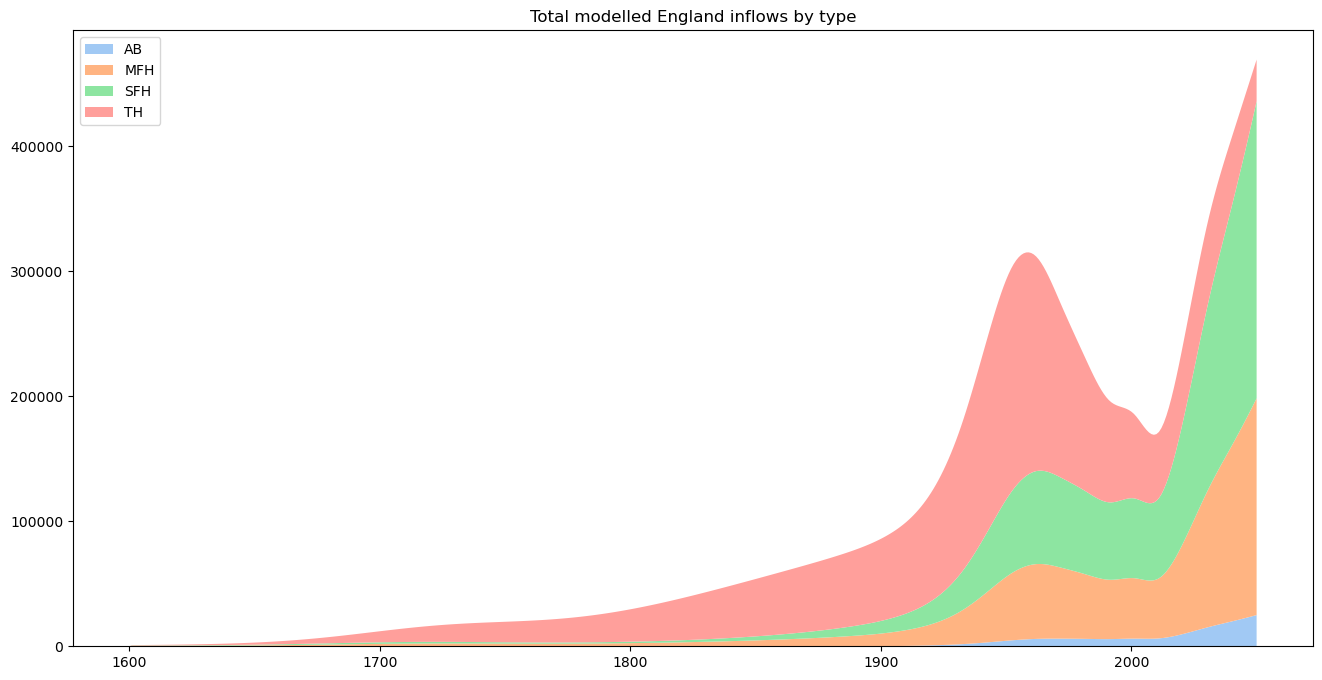

In [25]:
inflows_by_types = [inflow_shares['AB'].to_list(),inflow_shares['MFH'].to_list(),inflow_shares['SFH'].to_list(),inflow_shares['TH'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM.index,inflows_by_types, labels=TYP, colors=colors)
plt.legend(loc='upper left')
plt.title('Total modelled England inflows by type')
plt.savefig("Output/Inflows-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Calibration and validation (check what we should keep)

In [26]:
# England total completions => total number of new constructions 

file = "Data/GOV UK/CBP07671---Housing-supply---Historical-statistics-for-the-UK.xlsx"
sh = "HB.E"
housing_supply = pd.read_excel(file,sheet_name=sh)

housing_supply.columns = housing_supply.loc[0,:]
housing_supply = housing_supply.drop(index=0,columns="Notes")
housing_supply = housing_supply.set_index('Year')
housing_supply.index.name = None

display(housing_supply)

housing_supply_total = pd.DataFrame(housing_supply['Total completions'])

display(housing_supply_total)

,No. of completions by private enterprise,No. of completions by social housing developers,"Of which, no. of completions by local authorities","Of which, no. of completions by housing associations",Total completions,Percentage of total completions by private enterprise,Percentage of total completions by social housing developers,"Of which, percentage of completions by local authorities","Of which, percentage of completions by housing associations",Total
1946,28760,20500,20400,100,49250,0.583959,0.416244,0.414213,0.00203,1
1947,38630,82230,81370,860,120860,0.319626,0.680374,0.673258,0.007116,1
1948,30370,163220,161400,1820,193590,0.156878,0.843122,0.833721,0.009401,1
1949,23800,138310,136980,1330,162110,0.146814,0.853186,0.844982,0.008204,1
1950,25310,138030,136530,1500,163340,0.154953,0.845047,0.835864,0.009183,1
...,...,...,...,...,...,...,...,...,...,...
2018,135210,30280,2690,27590,165490,0.817028,0.182972,0.016255,0.166717,1
2019,143690,34190,2190,32000,177880,0.807792,0.192208,0.012312,0.179897,1
2020,120030,26590,1270,25320,146620,0.818647,0.181353,0.008662,0.172691,1
2021,142130,32820,1590,31230,174940,0.81245,0.187607,0.009089,0.178518,1


,Total completions
1946,49250
1947,120860
1948,193590
1949,162110
1950,163340
...,...
2018,165490
2019,177880
2020,146620
2021,174940


In [27]:
# TBD Calculate here the ration thanks to recent construction / change of use data 

ratio = 0.16431673850261094

In [28]:
housing_inflow_total = housing_supply_total.copy(deep=True)
housing_inflow_total.columns = ['Inflow']
for i in housing_inflow_total.index:
    housing_inflow_total.loc[i,'Inflow'] *= (1+ratio)

display(housing_inflow_total)

,Inflow
1946,57342.599371
1947,140719.321015
1948,225400.077407
1949,188747.386479
1950,190179.496067
...,...
2018,192682.777055
2019,207108.661445
2020,170712.120199
2021,203685.570234


<AxesSubplot:>

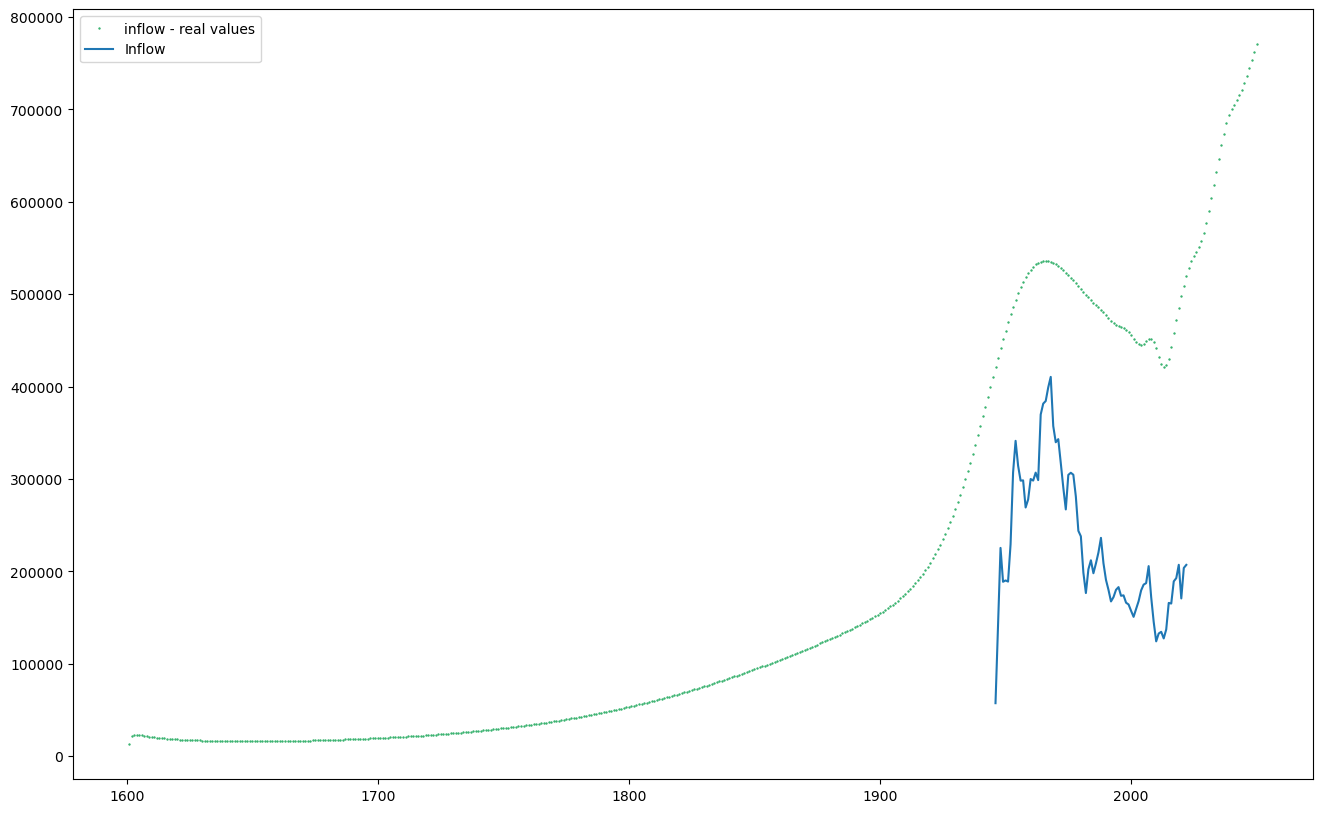

In [29]:
plt.figure(figsize=(16,10))
plt.plot(DSM_model.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
sns.lineplot(housing_inflow_total)

In [30]:
### Check that Inflow - Outflow = Stock Change
#DSM_AB_model=pd.DataFrame(DSM_AB_model)

'''plt.figure(figsize=(16,10))
DSM_AB_model['Stock change']= DSM_AB_model['Stock'].diff()
DSM_MFH_model['Stock change']= DSM_MFH_model['Stock'].diff()
DSM_SFH_model['Stock change']= DSM_SFH_model['Stock'].diff()
DSM_TH_model['Stock change']= DSM_TH_model['Stock'].diff()



plt.plot(DSM_AB_model['Stock change'], '+', color = 'green', markersize = 2,label='AB stock change')
plt.plot(DSM_AB_model['Inflow']-DSM_AB_model['Outflow'],color = 'green',markersize = 1, label = 'AB stock change from the model',alpha=0.5)

plt.plot(DSM_MFH_model['Stock change'], '+',color = 'yellow', markersize = 2,label='MFH stock change')
plt.plot(DSM_MFH_model['Inflow']-DSM_MFH_model['Outflow'],color = 'yellow',markersize = 1, label = 'MFH stock change from the model',alpha=0.5)

plt.plot(DSM_SFH_model['Stock change'], '+', color='blue',markersize = 2,label='SFH stock change')
plt.plot(DSM_SFH_model['Inflow']-DSM_SFH_model['Outflow'], color = 'blue',markersize = 1, label = 'SFH stock change from the model',alpha=0.5)

plt.plot(DSM_TH_model['Stock change'], '+', color='red', markersize = 2,label='TH stock change')
plt.plot(DSM_TH_model['Inflow']-DSM_TH_model['Outflow'],color='red',markersize = 1,label = 'TH stock change from the model',alpha=0.5)

plt.legend()
plt.show()'''


"plt.figure(figsize=(16,10))\nDSM_AB_model['Stock change']= DSM_AB_model['Stock'].diff()\nDSM_MFH_model['Stock change']= DSM_MFH_model['Stock'].diff()\nDSM_SFH_model['Stock change']= DSM_SFH_model['Stock'].diff()\nDSM_TH_model['Stock change']= DSM_TH_model['Stock'].diff()\n\n\n\nplt.plot(DSM_AB_model['Stock change'], '+', color = 'green', markersize = 2,label='AB stock change')\nplt.plot(DSM_AB_model['Inflow']-DSM_AB_model['Outflow'],color = 'green',markersize = 1, label = 'AB stock change from the model',alpha=0.5)\n\nplt.plot(DSM_MFH_model['Stock change'], '+',color = 'yellow', markersize = 2,label='MFH stock change')\nplt.plot(DSM_MFH_model['Inflow']-DSM_MFH_model['Outflow'],color = 'yellow',markersize = 1, label = 'MFH stock change from the model',alpha=0.5)\n\nplt.plot(DSM_SFH_model['Stock change'], '+', color='blue',markersize = 2,label='SFH stock change')\nplt.plot(DSM_SFH_model['Inflow']-DSM_SFH_model['Outflow'], color = 'blue',markersize = 1, label = 'SFH stock change from the

Input in year 1970:  283277.21239632874
Input modelle in year 1970:  277860.89364067314
Output in year 1970:  53879.74388943924
Input in year 2022:  268392.5951252373
Input modelled in year 2022:  265803.0734633041
Output in year 2022:  109772.26636010615


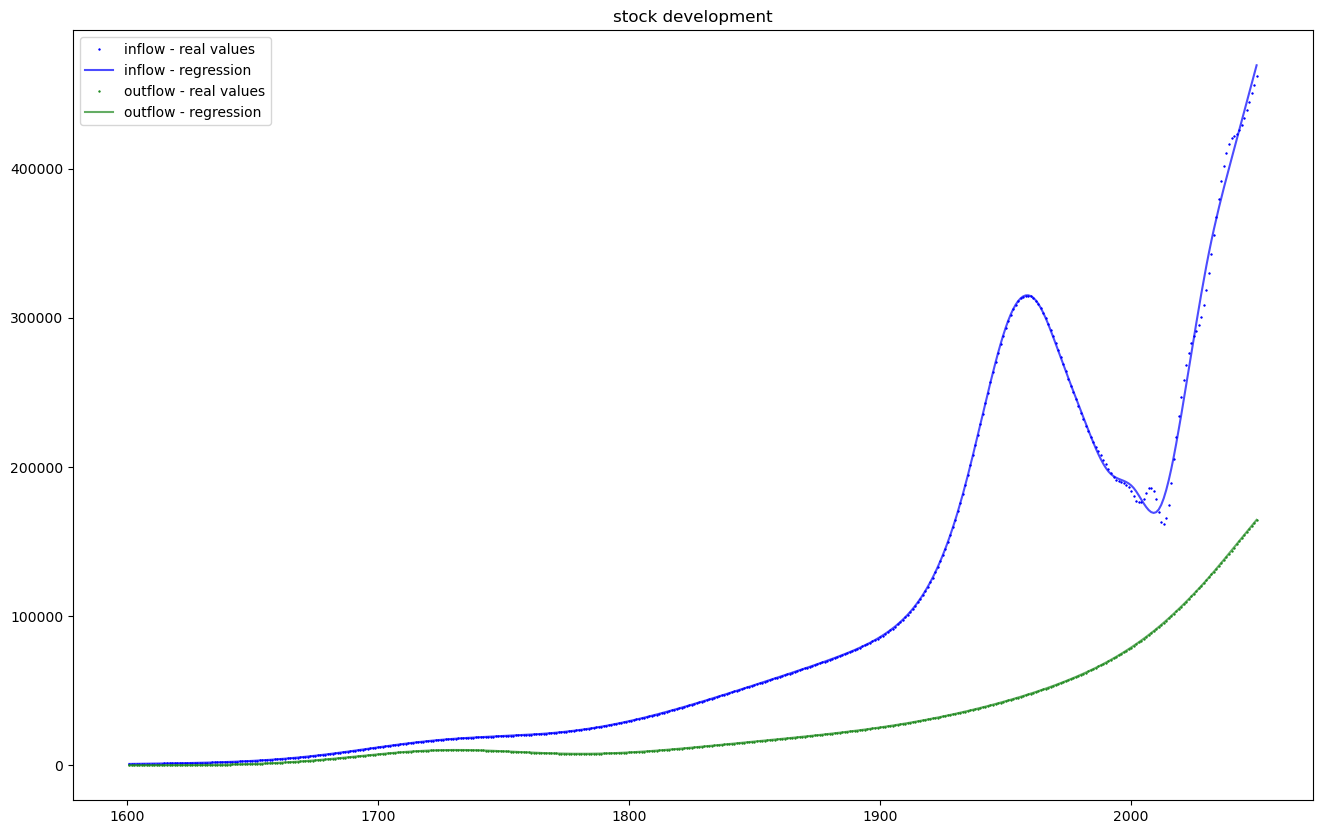

<Figure size 640x480 with 0 Axes>

In [31]:
def stock_driven_flows(lt_mean,lt_dev,dystomod,nm="dwelling stock"):
    lifetime = {
    'Type': 'Normal', # LogNormal ; FoldedNormal ; #Normal
    'Mean': np.array([lt_mean]), 
    'StdDev': np.array([lt_dev])
    }
    flow = dsm.DynamicStockModel(t=dystomod.index,name=nm,s=np.array(dystomod['Stock']),lt=lifetime)
    S_C, O_C, I = flow.compute_stock_driven_model()
    O = flow.compute_outflow_total()
    DS = flow.compute_stock_change()
    #display(I)
    #display(O)
    DSM_model = dystomod.copy(deep=True)
    #DSM_model = DSM.set_index('Unnamed: 0')
    DSM_model.index.name = None
    #display(DSM_model)
    
    ### If there are negative values ###
    I=np.array(I)
    O=np.array(O)
    I_copy=I.copy()
    I[I<0]=0
    diff=I-I_copy
    O=O+diff
    # difference = np.abs(I -np.max(0,I))
    # I = I.apply(lambda x: max(0, x))
    # O = O + difference
    
    inputs = dystomod.index
    outputs = dystomod["Stock"]
    pred_inputs = DSM_model.index
    inputs = np.array(inputs)
    pred_inputs=np.array(pred_inputs)
    outputs=np.array(outputs)
    
    ### Logistic regression ###
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # O_model = logistic_stock(DSM_model.index, *popt)
    # popt, pcov = curve_fit(logistic_stock, dystomod.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
    # I_model = logistic_stock(DSM_model.index, *popt)
    
    # ## Polynomial regression ###
    # degree_I=6
    # polynomial_I = np.poly1d(np.polyfit(DSM_model.index, I, degree_I))
    # print(f' the polynomial our fit created is: \n{polynomial_I}.')
    # I_model = polynomial_I(pred_inputs)
    
    # degree_O=4
    # polynomial_O = np.poly1d(np.polyfit(DSM_model.index, O, degree_O))
    # print(f' the polynomial our fit created is: \n{polynomial_O}.')
    # O_model = polynomial_O(pred_inputs)
    
    # ### NCS regression ###
    no_knots = int(len(O)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], O[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    O_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    no_knots = int(len(I)/10)
    ncs_model = ncs.get_natural_cubic_spline_model(inputs[1:], I[1:], minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
    I_model = ncs_model.predict(inputs[1:])
    fit_label = f'natural cubic splines with {no_knots} knots'
    
    
    # plt.figure(figsize=(16,10))
    # plt.plot(DSM_model.index[1:], I[1:], 's', color = 'black', markersize = 1, label = f'dwelling size')
    # plt.plot(DSM_model.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
    # plt.title('polynomial regression on AB dwelling size data set')
    # plt.legend()
    # plt.show()
    
    
    print('Input in year 1970: ', I[1970-1600])
    print('Input modelle in year 1970: ', I_model[1970-1600])
    print('Output in year 1970: ', O[1970-1600])
    print('Input in year 2022: ', I[2022-1600])
    print('Input modelled in year 2022: ', I_model[2022-1600])
    print('Output in year 2022: ', O[2022-1600])
    #print('Model input in year 2022: ', I_model[2022-1600])
    #print('Model output in year 2022: ', O_model[2022-1600])
    #print('I is: ', len(I))
    #print('O is: ', len(O))
    plt.figure(figsize=(16,10))
    #plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
    plt.plot(DSM_model.index[1:], I[1:], '+', color = 'blue', markersize = 2, label = f'inflow - real values')
    plt.plot(DSM_model.index[1:], I_model, color = 'blue', markersize = 1, label = f'inflow - regression', alpha=0.7)
    plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
    plt.plot(DSM_model.index[1:], O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
    plt.title('stock development')
    plt.legend()
    plt.show()
    DSM_model['Outflow'][1:] = O_model
    DSM_model['Inflow'][1:] = I_model
    #display(DSM_model)
    return DSM_model,I_model,O_model

DSM_model = stock_driven_flows(125,35,DSM,"total dwelling stock")
plt.savefig('Output/Inflow-Outflow-Regression.png',dpi=300,bbox_inches='tight')


# Creation of the tables

In [32]:
times_index = range(1600,2051)
cohort_index = range(1600,2051)

stock_AB = pd.DataFrame(index=times_index, columns=cohort_index)
stock_AB=stock_AB.fillna(0)

display(stock_AB)

stock_MFH = pd.DataFrame(index=times_index, columns=cohort_index)
stock_MFH=stock_MFH.fillna(0)

stock_SFH = pd.DataFrame(index=times_index, columns=cohort_index)
stock_SFH=stock_SFH.fillna(0)

stock_TH = pd.DataFrame(index=times_index, columns=cohort_index)
stock_TH=stock_TH.fillna(0)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
def lifetime(t,c,sigma=125,tau=35):
    lifetime = 1/(sigma*sqrt(2*pi))*exp(-(t-c-tau)**2/(2*sigma**2))
    return(lifetime)

def remain_stock(inflow,t,c,sigma=125,tau=35):
    if t==c:
        remain_stock=inflow
    else:
        total_lifetime_distribution=0
        for i in range(c,t+1):
            total_lifetime_distribution+=lifetime(i,c)
        remain_stock=inflow-inflow*total_lifetime_distribution
    return(remain_stock)

In [34]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_AB.loc[t,c]=remain_stock(inflow_shares.loc[c,'AB'],t,c)
        
stock_AB.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_MFH.loc[t,c]=remain_stock(inflow_shares.loc[c,'MFH'],t,c)
        
stock_MFH.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,314.768061,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,312.833973,319.755718,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,311.863784,317.790984,324.653409,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,310.891575,316.805422,322.658581,329.461859,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_SFH.loc[t,c]=remain_stock(inflow_shares.loc[c,'SFH'],t,c)
        
stock_SFH.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,284.444123,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,282.696360,288.350735,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,281.819637,286.578968,292.153542,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,280.941088,285.690203,290.358409,295.853494,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
for c in range (1600,2051):
    for t in range(c,2051):
        stock_TH.loc[t,c]=remain_stock(inflow_shares.loc[c,'TH'],t,c)
        
stock_TH.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,317.296911,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,315.347285,329.478304,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,314.369302,327.453830,341.853468,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,313.389282,326.438300,339.752955,354.420727,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
display(stock_AB)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,19960.928106,20507.779251,21063.465422,21628.052611,22201.606531,22854.329126,0.000000,0.000000,0.000000,0.000000
2047,0,0,0,0,0,0,0,0,0,0,...,19897.744021,20443.190676,20997.463564,21560.628966,22132.752891,22713.901062,23375.875980,0.000000,0.000000,0.000000
2048,0,0,0,0,0,0,0,0,0,0,...,19834.444583,20378.480043,20931.332745,21493.069259,22063.755886,22643.458648,23232.243279,23903.531580,0.000000,0.000000
2049,0,0,0,0,0,0,0,0,0,0,...,19771.033641,20313.651271,20865.076953,21425.377546,21994.619642,22572.869560,23160.193334,23756.656709,24437.319601,0.000000


# Plot

In [39]:
columns=['Population','Stock','PpD','Stock Change', 'Inflow','Outflow']
index=range(1600,2051)
donnees = {
    'Population': [0] * len(index),
    'Stock': [0] * len(index),
    'PpD': [0] * len(index),
    'Stock Change' : [0] * len(index),
    'Inflow' : [0] * len(index),
    'Outflow' : [0] * len(index)}

DSM_AB_model = pd.DataFrame(donnees, index=index)
DSM_MFH_model = pd.DataFrame(donnees, index=index)
DSM_SFH_model = pd.DataFrame(donnees, index=index)
DSM_TH_model = pd.DataFrame(donnees, index=index)


In [40]:
display(inflow_shares)

,AB,MFH,SFH,TH
1600,0.000000,0.000000,0.000000,0.000000
1601,0.000000,314.768061,284.444123,317.296911
1602,0.000000,319.755718,288.350735,329.478304
1603,0.000000,324.653409,292.153542,341.853468
1604,0.000000,329.461859,295.853494,354.420727
...,...,...,...,...
2046,22854.329126,159741.537245,218512.003986,43184.554613
2047,23375.875980,163107.358168,223235.980229,40851.258733
2048,23903.531580,166509.070698,228012.188644,38423.730327
2049,24437.319601,169946.880887,232840.902686,35901.466215


In [41]:
DSM_AB_model['Inflow']=inflow_shares['AB']
DSM_MFH_model['Inflow']=inflow_shares['MFH']
DSM_SFH_model['Inflow']=inflow_shares['SFH']
DSM_TH_model['Inflow']=inflow_shares['TH']

In [42]:
display(stock_AB.sum(axis=1).diff())

1600             NaN
1601        0.000000
1602        0.000000
1603        0.000000
1604        0.000000
            ...     
2046    19983.427973
2047    20434.153815
2048    20889.381150
2049    21349.115341
2050    21813.361731
Length: 451, dtype: float64

In [43]:
DSM_AB_model['Stock change'] = stock_AB.sum(axis=1).diff()
DSM_MFH_model['Stock change'] = stock_MFH.sum(axis=1).diff()
DSM_SFH_model['Stock change'] = stock_SFH.sum(axis=1).diff()
DSM_TH_model['Stock change'] = stock_TH.sum(axis=1).diff()

In [44]:
display(stock_AB)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,19960.928106,20507.779251,21063.465422,21628.052611,22201.606531,22854.329126,0.000000,0.000000,0.000000,0.000000
2047,0,0,0,0,0,0,0,0,0,0,...,19897.744021,20443.190676,20997.463564,21560.628966,22132.752891,22713.901062,23375.875980,0.000000,0.000000,0.000000
2048,0,0,0,0,0,0,0,0,0,0,...,19834.444583,20378.480043,20931.332745,21493.069259,22063.755886,22643.458648,23232.243279,23903.531580,0.000000,0.000000
2049,0,0,0,0,0,0,0,0,0,0,...,19771.033641,20313.651271,20865.076953,21425.377546,21994.619642,22572.869560,23160.193334,23756.656709,24437.319601,0.000000


In [45]:
DSM_AB_model['Outflow'] = inflow_shares['AB'] - stock_AB.sum(axis=1).diff()
DSM_MFH_model['Outflow'] = inflow_shares['MFH'] - stock_MFH.sum(axis=1).diff()
DSM_SFH_model['Outflow'] = inflow_shares['SFH'] - stock_SFH.sum(axis=1).diff()
DSM_TH_model['Outflow'] = inflow_shares['TH'] - stock_TH.sum(axis=1).diff()

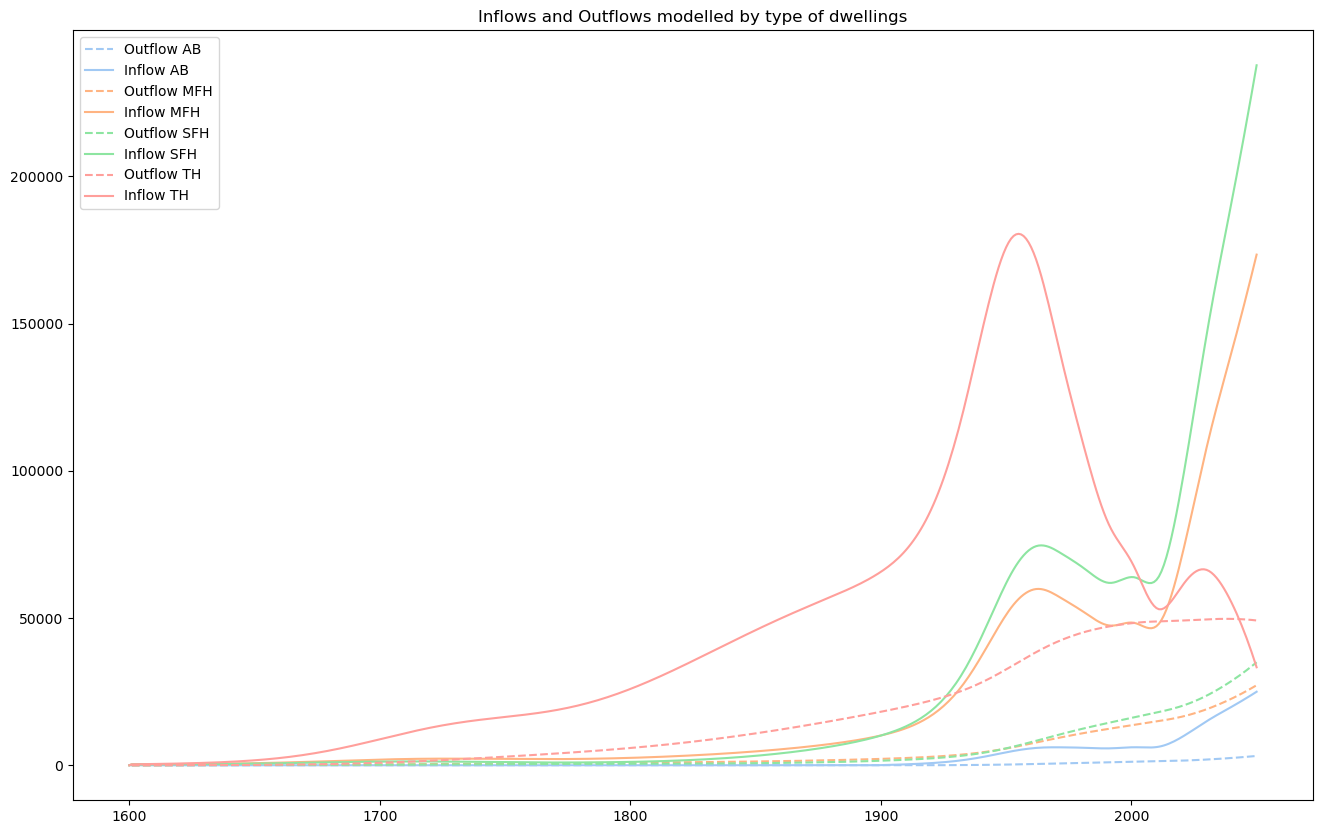

In [46]:
plt.figure(figsize=(16,10))
colors = sns.color_palette('pastel')[0:4]
plt.plot(DSM_AB_model['Outflow'],color=colors[0],linestyle='dashed', label='Outflow AB')
plt.plot(DSM_AB_model['Inflow'], color=colors[0], label='Inflow AB')
plt.plot(DSM_MFH_model['Outflow'],color=colors[1],linestyle='dashed', label='Outflow MFH')
plt.plot(DSM_MFH_model['Inflow'], color=colors[1], label='Inflow MFH')
plt.plot(DSM_SFH_model['Outflow'],color=colors[2],linestyle='dashed', label='Outflow SFH')
plt.plot(DSM_SFH_model['Inflow'], color=colors[2], label='Inflow SFH')
plt.plot(DSM_TH_model['Outflow'],color=colors[3],linestyle='dashed', label='Outflow TH')
plt.plot(DSM_TH_model['Inflow'], color=colors[3], label='Inflow TH')
plt.title('Inflows and Outflows modelled by type of dwellings')
plt.legend()
plt.show()

In [47]:
display(DSM_AB_model['Inflow'])

1600        0.000000
1601        0.000000
1602        0.000000
1603        0.000000
1604        0.000000
            ...     
2046    22854.329126
2047    23375.875980
2048    23903.531580
2049    24437.319601
2050    24977.263712
Name: Inflow, Length: 451, dtype: float64

In [48]:
display(DSM_AB_model['Outflow'])

1600            NaN
1601       0.000000
1602       0.000000
1603       0.000000
1604       0.000000
           ...     
2046    2870.901153
2047    2941.722164
2048    3014.150430
2049    3088.204260
2050    3163.901982
Name: Outflow, Length: 451, dtype: float64

In [49]:
DSM_AB_model['Stock'] = DSM_AB_model['Stock change'].cumsum()
DSM_MFH_model['Stock'] = DSM_MFH_model['Stock change'].cumsum()
DSM_SFH_model['Stock'] = DSM_SFH_model['Stock change'].cumsum()
DSM_TH_model['Stock'] = DSM_TH_model['Stock change'].cumsum()

In [50]:
display(DSM_model[0])

,Population,Stock,PpD,Stock change,Inflow,Outflow
1600,3.776927e+06,8.023546e+05,4.707304,NaN,NaN,NaN
1601,3.781220e+06,8.032665e+05,4.707304,NaN,916.509095,10.760887
1602,3.785584e+06,8.041936e+05,4.707304,NaN,937.584757,14.401747
1603,3.790022e+06,8.051364e+05,4.707304,NaN,958.660418,18.042608
1604,3.794534e+06,8.060949e+05,4.707304,NaN,979.736080,21.683468
...,...,...,...,...,...,...
2046,6.034682e+07,3.002637e+07,2.009794,NaN,444292.424970,156363.428885
2047,6.046523e+07,3.031293e+07,1.994701,NaN,450570.473109,158416.776909
2048,6.058215e+07,3.060310e+07,1.979608,NaN,456848.521249,160470.124932
2049,6.069759e+07,3.089698e+07,1.964515,NaN,463126.569389,162523.472955


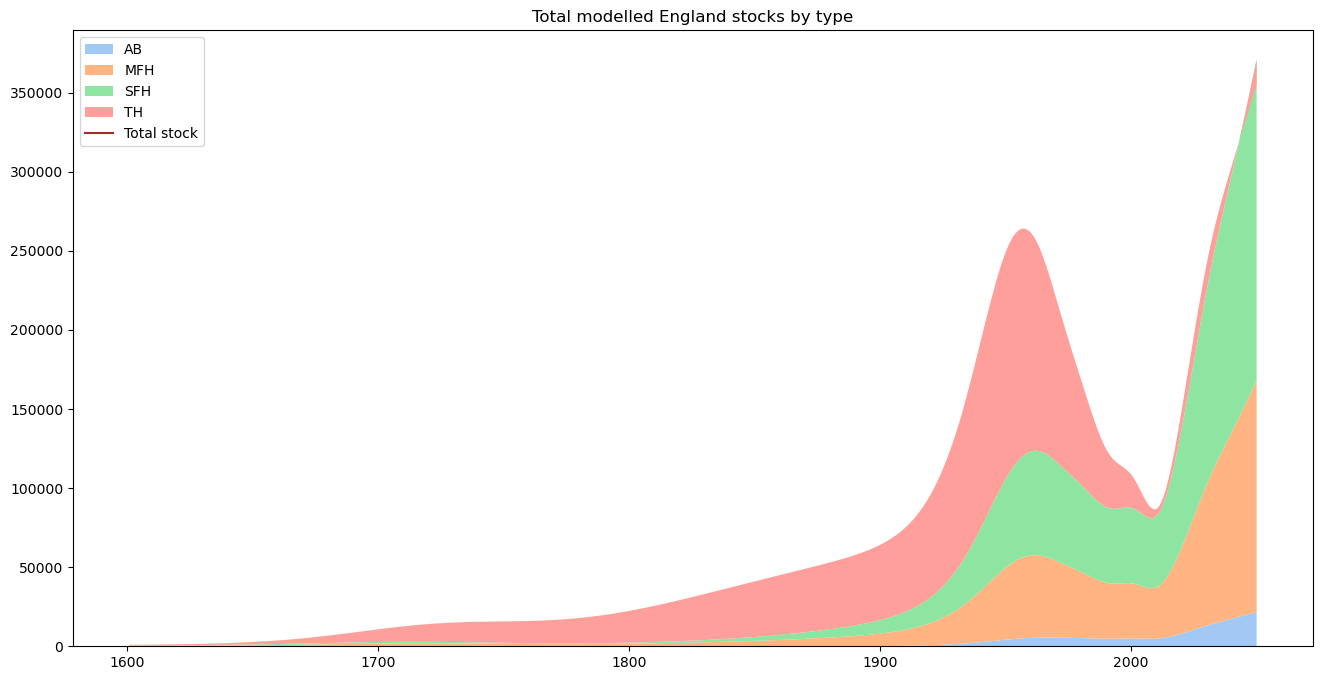

In [51]:
stock_change_by_types = [DSM_AB_model['Stock change'].to_list(),DSM_MFH_model['Stock change'].to_list(),DSM_SFH_model['Stock change'].to_list(),DSM_TH_model['Stock change'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM.index,stock_change_by_types, labels=TYP, colors=colors)
plt.plot(DSM_model[0]['Stock change'],label='Total stock',color='brown')
plt.legend(loc='upper left')
plt.title('Total modelled England stocks by type')
#plt.savefig("Output/Stocks-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Validation

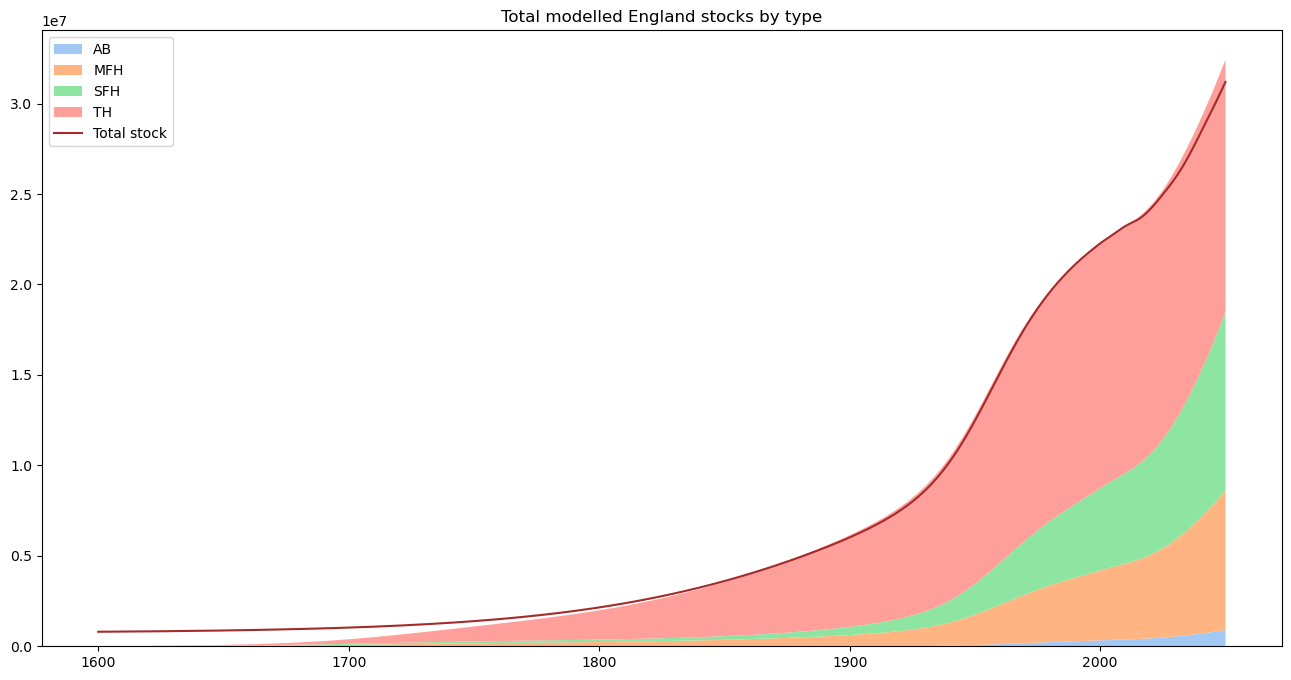

In [52]:
stock_by_types = [DSM_AB_model['Stock'].to_list(),DSM_MFH_model['Stock'].to_list(),DSM_SFH_model['Stock'].to_list(),DSM_TH_model['Stock'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM.index,stock_by_types, labels=TYP, colors=colors)
plt.plot(DSM_model[0]['Stock'],label='Total stock',color='brown')
plt.legend(loc='upper left')
plt.title('Total modelled England stocks by type')
plt.savefig("Output/Stocks-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Exportation

In [53]:
stock_AB.to_csv('Model/stock_AB.csv',index_label='Time ↓ \ Cohort →')
stock_MFH.to_csv('Model/stock_MFH.csv', index_label='Time ↓ \ Cohort →')
stock_SFH.to_csv('Model/stock_SFH.csv', index_label='Time ↓ \ Cohort →')
stock_TH.to_csv('Model/stock_TH.csv', index_label='Time ↓ \ Cohort →')

In [54]:
DSM_AB_model.to_csv('Model/DSM_model_AB.csv')
DSM_MFH_model.to_csv('Model/DSM_model_MFH.csv')
DSM_SFH_model.to_csv('Model/DSM_model_SFH.csv')
DSM_TH_model.to_csv('Model/DSM_model_TH.csv')